In [1]:
import pandas as pd
from pandas import DataFrame as DF

#Pre-processing
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer as WNL

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
from sklearn.decomposition import LatentDirichletAllocation

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Visual Representation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

In [2]:
# Data Cleaning, Stop words removal
lemma = WNL()
def clean_tweet(tweet):
    temp = tweet.lower()
    if(temp[:2] == 'rt'):
        temp = temp[2:]
    temp = re.sub("'", "", temp)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords.words('english') or len(w)<3]
    temp = " ".join(word for word in temp)
    temp = lemma.lemmatize(temp)
    return temp

In [3]:
data = pd.read_csv('P2_Data.csv')
print(data)
data = data.drop_duplicates(subset=['Tweet'])
data = data.reset_index()
arr = []
for i in range(len(data)):
    data['Tweet'][i] = clean_tweet(str(data['Tweet'][i]))
    if(len(data['Tweet'][i])>0):
        arr.append(data['Tweet'][i])
d = {'Processed_Tweets' : arr}  
df = DF(d)

     Unnamed: 0                                              Tweet
0             0  We all need to stand by @foodpharmer\n\nShame ...
1             1  Distinctly remember how companies like CadB we...
2             2  New Article in #Diabetes and #Metabolic Syndro...
3             3  In Pictures: Prolonged sitting linked to type ...
4             4  Sant Shri Asharamji Bapu has unveiled many sec...
..          ...                                                ...
199         199  #WorldHealthDay 2023 reminds us of the progres...
200         200  Diabetes sounds like you’re going to die when ...
201         201  Whatever the #theme , it is difficult to keep ...
202         202  @jaganmsna @SahilKapoor @harshmadhusudan Genet...
203         203  Those living with co-morbidities - uncontrolle...

[204 rows x 2 columns]


In [4]:
print(df)

                                      Processed_Tweets
0    we need to stand by shame on to sue a content ...
1    distinctly remember companies like cadb stars ...
2    new article in syndrome ranked journal diabete...
3    in pictures prolonged sitting linked to type 2...
4    sant shri asharamji bapu unveiled many secrets...
..                                                 ...
198  2023 reminds us of progress in global public h...
199  diabetes sounds like re going to die hear it i...
200  whatever it is difficult to keep of it so here...
201  genetics plays a high role in diabetes nonethe...
202  living co morbidities uncontrolled diabetes ch...

[203 rows x 1 columns]


In [5]:
processed_df = df.to_csv('Processed_tweets.csv',header = True)
dataset = pd.read_csv('Processed_tweets.csv',)
for i in dataset['Processed_Tweets']:
    print(i)
dataset['Processed_Tweets'] = dataset['Processed_Tweets'].apply(lambda x : ' '.join([str(w) for w in x.split() if len(w)>3]))

we need to stand by shame on to sue a content creator telling truth of product to everyone stop selling diabetes to kids do better heres video sue thousands
distinctly remember companies like cadb stars of pre placement presentations in my b school days seeing diabetes sellers in guise of an fmcg show true colours by bullying citizens makes me glad i t make it to of
new article in syndrome ranked journal diabetes endocrinology in differences in pathways influencing leisure time a structural equation analysis s garg
in pictures prolonged sitting linked to type 2 risk
sant shri asharamji bapu unveiled many secrets of effective amp cure many serious diseases he shared a harmless way of healing diabetes no side effects builds immunity amp is good health
yes high time we look at entire spectrum nutrition rising promoting needed
white crystal sugar amp sweetcorn juice called solvent used in bakeries amp packaged products as sweetner is main culprit of heart attack diabetes another scam of we

In [6]:
vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

In [7]:
bag_words = vectorizer.fit_transform(dataset['Processed_Tweets'])
print(vectorizer.get_feature_names_out())
tf_feature_names = vectorizer.get_feature_names_out()

['2023' '500mg' '9675144144' '9810043684' 'acidity' 'activity'
 'acupressure' 'adult' 'advanced' 'adverse' 'afternoon' 'ageing' 'agree'
 'alternative' 'amar' 'ambedkar' 'amit' 'analysis' 'anti' 'april'
 'article' 'asked' 'asthma' 'attack' 'attacks' 'attitude' 'avoid'
 'awareness' 'away' 'awesome' 'ayurvedic' 'bacteria' 'baisakhi'
 'bariatric' 'beneficial' 'benefits' 'best' 'better' 'blood' 'body'
 'bound' 'bournvita' 'breast' 'brilliant' 'bring' 'builds' 'cadbury'
 'calories' 'cancer' 'cancers' 'carb' 'carbohydrate' 'carbs'
 'cardiovascular' 'care' 'case' 'cases' 'cause' 'causes' 'celebrate'
 'centre' 'chabra' 'changes' 'chauda' 'check' 'chemicals' 'child'
 'children' 'chocolate' 'cholesterol' 'chronic' 'cipla' 'claims' 'clinic'
 'clinical' 'cold' 'common' 'company' 'complications' 'conditions'
 'conducted' 'conference' 'constipation' 'consume' 'consumers'
 'consumption' 'contact' 'content' 'control' 'convention' 'cough' 'covid'
 'cure' 'daily' 'days' 'dear' 'death' 'debility' 'deficie

In [10]:
tfidf_bag_words = tfidf_vectorizer.fit_transform(dataset['Processed_Tweets'])
print(tfidf_vectorizer.get_feature_names_out())
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

['2023' '500mg' '9675144144' '9810043684' 'acidity' 'activity'
 'acupressure' 'adult' 'advanced' 'adverse' 'afternoon' 'ageing' 'agree'
 'alternative' 'amar' 'ambedkar' 'amit' 'analysis' 'anti' 'april'
 'article' 'asked' 'asthma' 'attack' 'attacks' 'attitude' 'avoid'
 'awareness' 'away' 'awesome' 'ayurvedic' 'bacteria' 'baisakhi'
 'bariatric' 'beneficial' 'benefits' 'best' 'better' 'blood' 'body'
 'bound' 'bournvita' 'breast' 'brilliant' 'bring' 'builds' 'cadbury'
 'calories' 'cancer' 'cancers' 'carb' 'carbohydrate' 'carbs'
 'cardiovascular' 'care' 'case' 'cases' 'cause' 'causes' 'celebrate'
 'centre' 'chabra' 'changes' 'chauda' 'check' 'chemicals' 'child'
 'children' 'chocolate' 'cholesterol' 'chronic' 'cipla' 'claims' 'clinic'
 'clinical' 'cold' 'common' 'company' 'complications' 'conditions'
 'conducted' 'conference' 'constipation' 'consume' 'consumers'
 'consumption' 'contact' 'content' 'control' 'convention' 'cough' 'covid'
 'cure' 'daily' 'days' 'dear' 'death' 'debility' 'deficie

In [12]:
no_topics = 10
lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tfidf_bag_words)

In [13]:
def display_topics(model, feature_names, no_top_words):
    arr = []
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        arr.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print (([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return arr

In [17]:
no_top_words = int(input("Enter the number of words in each topic : "))
print("\n\n")
print("LDA Output")
LDA_output = display_topics(lda, tf_feature_names, no_top_words)

Enter the number of words in each topic : 10



LDA Output
Topic 0:
['diabetes', 'fruits', 'health', 'article', 'drugs', 'pose', 'syndrome', 'mellitus', 'journal', 'ranked']
Topic 1:
['lead', 'diabetes', 'world', 'pharma', 'research', 'read', 'india', 'blood', 'public', 'union']
Topic 2:
['diabetes', 'people', 'cipla', 'symptoms', 'drug', 'novartis', 'complications', 'used', 'bariatric', 'risk']
Topic 3:
['diabetes', 'heart', 'diet', 'weight', 'reduce', 'risk', 'reduced', 'help', 'disease', 'hypertension']
Topic 4:
['consumers', 'diabetes', 'asthma', 'high', 'health', 'patient', 'pressure', 'manage', 'imagine', 'blood']
Topic 5:
['issues', 'level', 'means', 'main', 'changes', 'mean', 'year', 'love', 'dear', 'important']
Topic 6:
['sugar', 'type', 'diabetes', 'risk', 'prevent', 'awareness', 'blood', 'people', 'heres', 'research']
Topic 7:
['details', '9810043684', 'test', 'cases', 'went', 'higher', 'diabetes', 'death', 'healing', 'jabbing']
Topic 8:
['learn', 'afternoon', 'favourite', '

In [18]:
arr = []
vals = []
values_list = list(tfidf_vectorizer.vocabulary_.values())
for i in LDA_output:
    for j in i:
        if j not in arr:
            arr.append(j)
            vals.append(values_list[list(tfidf_vectorizer.get_feature_names_out()).index(j)])
print(arr,vals)
print('\n\n')
print('Total number of unique topics generated : ',len(arr))

['diabetes', 'fruits', 'health', 'article', 'drugs', 'pose', 'syndrome', 'mellitus', 'journal', 'ranked', 'lead', 'world', 'pharma', 'research', 'read', 'india', 'blood', 'public', 'union', 'people', 'cipla', 'symptoms', 'drug', 'novartis', 'complications', 'used', 'bariatric', 'risk', 'heart', 'diet', 'weight', 'reduce', 'reduced', 'help', 'disease', 'hypertension', 'consumers', 'asthma', 'high', 'patient', 'pressure', 'manage', 'imagine', 'issues', 'level', 'means', 'main', 'changes', 'mean', 'year', 'love', 'dear', 'important', 'sugar', 'type', 'prevent', 'awareness', 'heres', 'details', '9810043684', 'test', 'cases', 'went', 'higher', 'death', 'healing', 'jabbing', 'learn', 'afternoon', 'favourite', 'saturday', 'sunday', 'effective', 'expert', 'says', 'avoid', 'taking', 'agree', 'point', 'limited', 'hear', 'making', 'watch', '500mg'] [46, 409, 88, 402, 62, 117, 349, 340, 86, 11, 208, 194, 113, 251, 372, 290, 289, 90, 352, 114, 54, 142, 367, 147, 322, 204, 166, 424, 391, 44, 199, 15

<AxesSubplot:xlabel='words'>

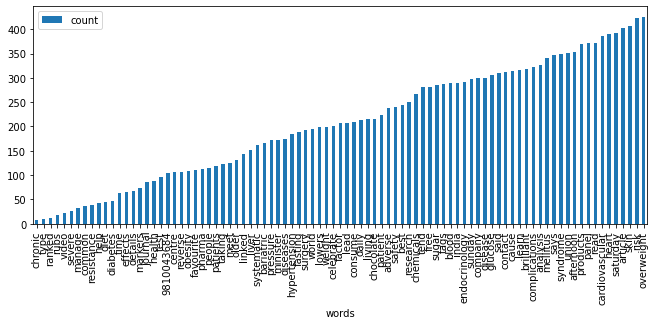

In [23]:
df_lda = DF({'words' : arr, 'count' : vals})
df_lda = df_lda.sort_values('count',ascending=True).set_index('words')
plt.rcParams['figure.figsize'] = (11, 4)
df_lda.plot.bar()

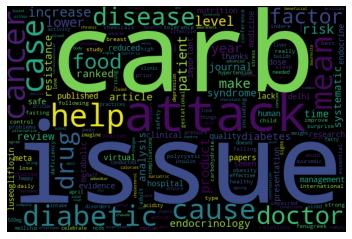

In [24]:
#Generate a word cloud image for given topic
vocab = tfidf_vectorizer.get_feature_names_out()
def draw_word_cloud(model):
    index = random.randint(0,no_topics-1)
    imp_words_topic=""
    comp=model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:500]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(lda)